/ofo-share/repos-david/conda/envs/MVMT-dev/lib/python3.9/site-packages/pyvista/jupyter/notebook.py:33: UserWarning: Failed to use notebook backend: 

No module named 'trame.ui.vuetify'

Falling back to a static output.
  warnings.warn(


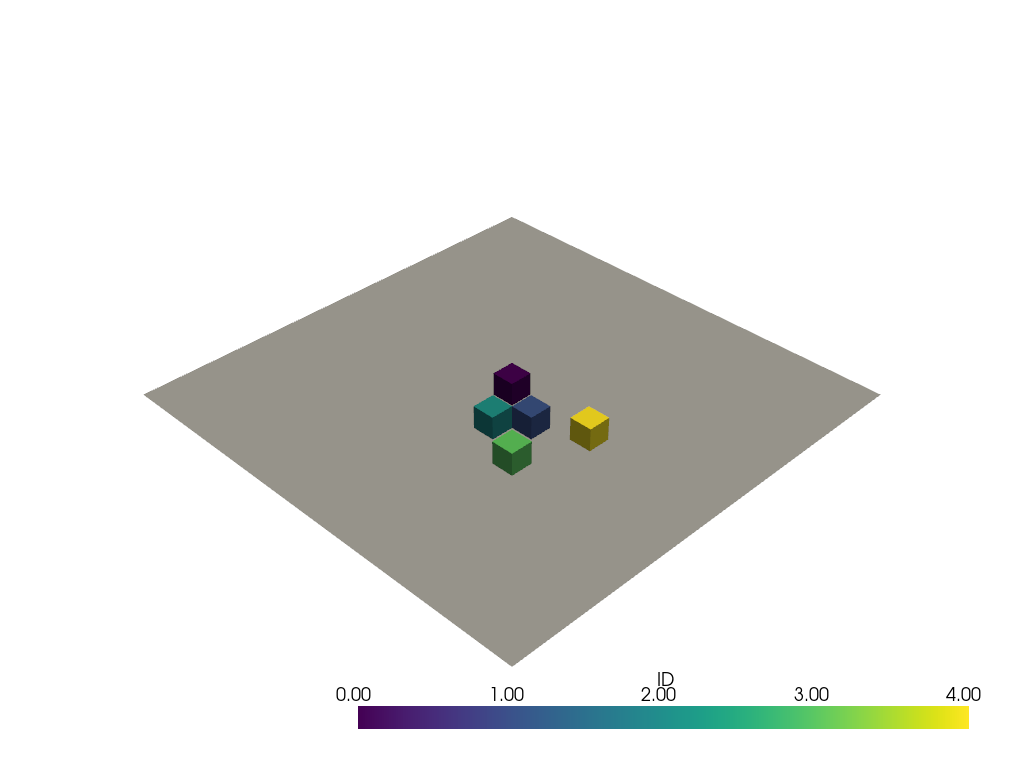

In [37]:
import pyvista as pv
import numpy as np

BOX_CENTERS = np.array([[0, 0], [1, 2], [2, 1], [3, 3], [0, 4]])

GRID_SIZE_X, GRID_SIZE_Y = (20, 20)
BOX_SIZE = 1

plotter = pv.Plotter()

boxes = []

for i, (x, y) in enumerate(BOX_CENTERS):
    x_min = x - BOX_SIZE / 2.0
    x_max = x + BOX_SIZE / 2.0
    y_min = y - BOX_SIZE / 2.0
    y_max = y + BOX_SIZE / 2.0

    box = pv.Box((x_min, x_max, y_min, y_max, 0, BOX_SIZE), quads=False)
    box["ID"] = np.full(box.n_cells, fill_value=float(i))
    boxes.append(box)

merged_mesh = pv.merge(boxes)
merged_mesh.triangulate(inplace=True)

ground_points = merged_mesh.points[merged_mesh.points[:, 2] == 0]
corner_points = (
    np.array(
        [
            [-GRID_SIZE_X, +GRID_SIZE_Y, 0],
            [+GRID_SIZE_X, +GRID_SIZE_Y, 0],
            [+GRID_SIZE_X, -GRID_SIZE_Y, 0],
            [-GRID_SIZE_X, -GRID_SIZE_Y, 0],
        ]
    )
    / 2
)
ground_points = np.concatenate((ground_points, corner_points), axis=0)
ground_points_pv = pv.PolyData(ground_points)

ground_surf = ground_points_pv.delaunay_2d()
ground_surf["ID"] = np.full(ground_surf.n_cells, fill_value=np.nan)

merged_mesh = pv.merge([merged_mesh, ground_surf])

plotter.add_mesh(merged_mesh, scalars="ID", show_edges=False)
plotter.show()